In [6]:
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
% matplotlib inline


In [10]:
download_robot_execution_failures()
df, y = load_robot_execution_failures()
df.head()


,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


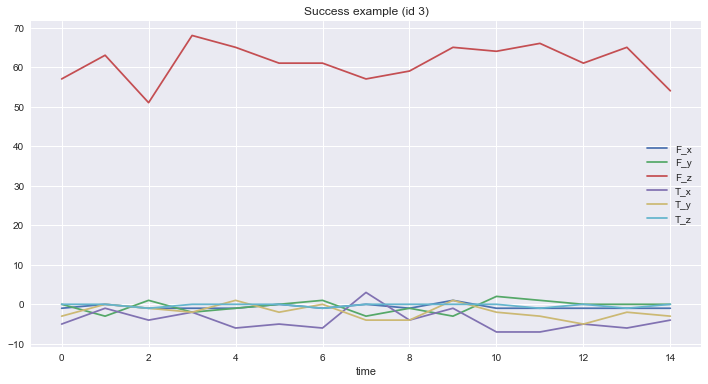

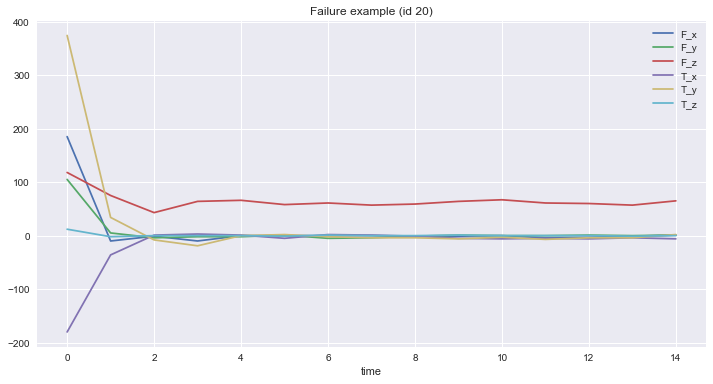

In [12]:
sns.set()
df[df.id == 3][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time', title='Success example (id 3)',
                                                                        figsize=(12, 6))
df[df.id == 20][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time', title='Failure example (id 20)',
                                                                         figsize=(12, 6))


In [15]:
extraction_settings = ComprehensiveFCParameters()
X = extract_features(df,
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function=impute)


Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

Feature Extraction:   5%|▌         | 1/20 [00:04<01:28,  4.67s/it]

Feature Extraction:  25%|██▌       | 5/20 [00:07<00:21,  1.46s/it]

Feature Extraction:  40%|████      | 8/20 [00:07<00:11,  1.07it/s]

Feature Extraction:  45%|████▌     | 9/20 [00:10<00:12,  1.11s/it]

Feature Extraction:  55%|█████▌    | 11/20 [00:10<00:08,  1.08it/s]

Feature Extraction:  60%|██████    | 12/20 [00:10<00:06,  1.17it/s]

Feature Extraction:  65%|██████▌   | 13/20 [00:12<00:06,  1.01it/s]

Feature Extraction:  75%|███████▌  | 15/20 [00:13<00:04,  1.15it/s]

Feature Extraction:  85%|████████▌ | 17/20 [00:14<00:02,  1.16it/s]

Feature Extraction:  90%|█████████ | 18/20 [00:15<00:01,  1.16it/s]

Feature Extraction: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s]

 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.

In [19]:
X.head()


variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""","F_x__agg_autocorrelation__f_agg_""median""","F_x__agg_autocorrelation__f_agg_""var""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-inf,T_z__value_count__value_0,T_z__value_count__value_1,T_z__value_count__value_inf,T_z__value_count__value_nan,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,2.602085e-17,0.105435,1.0,-1.0,-2.0,0.0,0.0,...,0.000000,-0.090909,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,0.0,...,0.000000,-0.181818,0.000000,0.0,8.0,1.0,0.0,0.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,0.0,...,-0.076923,-0.090909,-0.222222,0.0,9.0,2.0,0.0,0.0,0.382222,0.0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 4764 entries, F_x__abs_energy to T_z__variance_larger_than_standard_deviation
dtypes: float64(4764)
memory usage: 3.2 MB


In [20]:
X_filtered = extract_relevant_features(df, y,
                                       column_id='id', column_sort='time',
                                       default_fc_parameters=extraction_settings)


Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

Feature Extraction:   5%|▌         | 1/20 [00:05<01:37,  5.15s/it]

Feature Extraction:  25%|██▌       | 5/20 [00:07<00:23,  1.58s/it]

Feature Extraction:  45%|████▌     | 9/20 [00:10<00:13,  1.18s/it]

Feature Extraction:  55%|█████▌    | 11/20 [00:10<00:08,  1.02it/s]

Feature Extraction:  65%|██████▌   | 13/20 [00:14<00:07,  1.12s/it]

Feature Extraction:  70%|███████   | 14/20 [00:14<00:06,  1.06s/it]

Feature Extraction:  80%|████████  | 16/20 [00:14<00:03,  1.07it/s]

Feature Extraction:  85%|████████▌ | 17/20 [00:16<00:02,  1.03it/s]

Feature Extraction:  90%|█████████ | 18/20 [00:17<00:01,  1.02it/s]

Feature Extraction: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]

 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.

In [21]:
X_filtered.head()


variable,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,"F_z__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",...,T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9,"F_z__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","T_x__agg_autocorrelation__f_agg_""mean""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8",T_x__spkt_welch_density__coeff_5,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","F_z__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,0.65,...,0.0,0.0,62.833333,-0.095589,0.209184,0.037795,-1.000000,0.000000,63.0,0.000000
2,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,19.84,...,1.0,0.0,64.666667,-0.054604,0.000000,0.319311,-1.000000,0.222222,70.0,2.666667
3,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,22.01,...,1.0,0.0,67.333333,-0.061050,0.000000,9.102780,-3.000000,0.250000,68.0,8.187500
4,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,10.64,...,0.0,0.0,63.666667,-0.133794,1.555556,56.910262,-3.166667,1.360000,66.0,1.000000
5,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,16.00,...,0.0,0.6,64.333333,-0.106108,0.000000,22.841805,-4.166667,1.040000,67.0,0.000000


In [22]:
X_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 623 entries, F_x__abs_energy to F_z__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4
dtypes: float64(623)
memory usage: 429.0 KB


In [23]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)


In [24]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))


             precision    recall  f1-score   support

      False       1.00      1.00      1.00        27
       True       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        36


In [25]:
cl.n_features_


4764

In [26]:
cl2 = DecisionTreeClassifier()
cl2.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl2.predict(X_filtered_test)))


             precision    recall  f1-score   support

      False       1.00      1.00      1.00        27
       True       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        36


In [27]:
cl2.n_features_


623